In [ ]:
import pandas as pd
from textblob import TextBlob
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv('/content/tesla_stock_and_news.csv')

In [ ]:
df.index=df['Date']
df.drop(columns=['Date'], inplace=True)

In [ ]:
print(df.head())

                  Open       Close                    Headline
Date                                                          
2021-01-04  239.820007  243.256668  No specific news available
2021-01-05  241.220001  245.036667  No specific news available
2021-01-06  252.830002  251.993332  No specific news available
2021-01-07  259.209991  272.013336  No specific news available
2021-01-08  285.333344  293.339996  No specific news available


In [ ]:
def sentiment(text):
  blob=TextBlob(text)
  s=blob.sentiment.polarity
  return s

def subjectivity(text):
  blob=TextBlob(text)
  s=blob.sentiment.subjectivity
  return s

In [ ]:
df['Sentiment_polarity']=df['Headline'].apply(sentiment)
df['Sentiment_subjectivity']=df['Headline'].apply(subjectivity) # to be used as a measure for factual and personal opinions

In [ ]:
df.head()

,Open,Close,Headline,Sentiment_polarity,Sentiment_subjectivity
Date,,,,,
2021-01-04,239.820007,243.256668,No specific news available,0.2,0.2625
2021-01-05,241.220001,245.036667,No specific news available,0.2,0.2625
2021-01-06,252.830002,251.993332,No specific news available,0.2,0.2625
2021-01-07,259.209991,272.013336,No specific news available,0.2,0.2625
2021-01-08,285.333344,293.339996,No specific news available,0.2,0.2625


In [ ]:
# I am defining one more coloumn to show the dec or inc in the stock price
df['Difference'] = df['Close'] - df['Open']
# also the lstm model has no furthur requirement for headlines so let's drop the coloumn
df.drop(columns=['Headline'],inplace=True)

In [ ]:
df.head()

,Open,Close,Sentiment_polarity,Sentiment_subjectivity,Difference
Date,,,,,
2021-01-04,239.820007,243.256668,0.2,0.2625,3.436661
2021-01-05,241.220001,245.036667,0.2,0.2625,3.816666
2021-01-06,252.830002,251.993332,0.2,0.2625,-0.836670
2021-01-07,259.209991,272.013336,0.2,0.2625,12.803345
2021-01-08,285.333344,293.339996,0.2,0.2625,8.006653


In [ ]:
X = df[['Difference', 'Sentiment_polarity', 'Sentiment_subjectivity']].values
y = df['Close'].values
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# **LSTM Model Building**

In [ ]:
LEARNING_RATE = 0.001
model= Sequential([
    Bidirectional(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='mse')
history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0237 - val_loss: 0.3176
Epoch 2/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0162 - val_loss: 0.2870
Epoch 3/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0179 - val_loss: 0.3091
Epoch 4/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0149 - val_loss: 0.3152
Epoch 5/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0163 - val_loss: 0.3484
Epoch 6/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0132 - val_loss: 0.2902
Epoch 7/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0153 - val_loss: 0.3268
Epoch 8/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0144 - val_loss: 0.2865
Epoch 9/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0176 - val_loss: 0.2991
Epoch 10/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0148 - val_loss: 0.3474
Epoch 11/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0166 - val_loss: 0.3143
Epoch 12/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

In [ ]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
Mean Squared Error: 14143.521964442365
Mean Absolute Error: 115.9142925121166


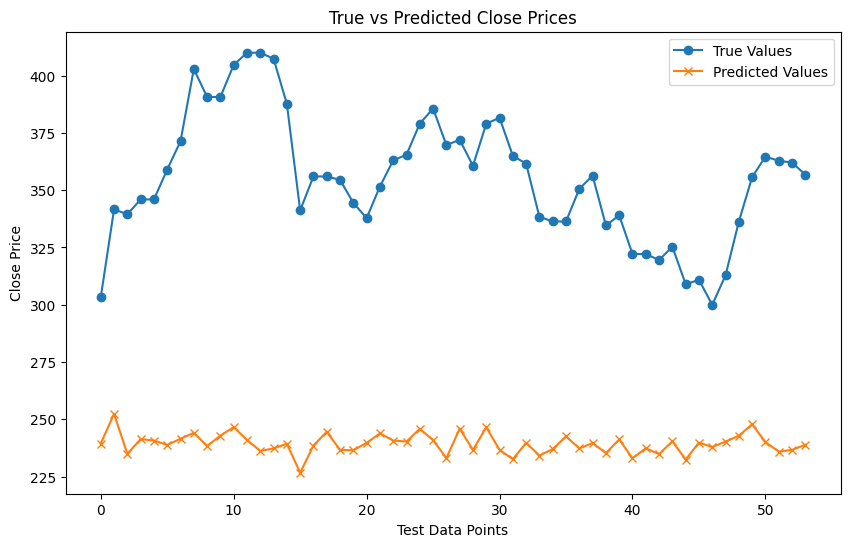

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_true, label='True Values', marker='o')
plt.plot(y_pred, label='Predicted Values', marker='x')
plt.title('True vs Predicted Close Prices')
plt.xlabel('Test Data Points')
plt.ylabel('Close Price')
plt.legend()
plt.show()


**Very poor results.**

# **ARIMA integrated LSTM**

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
import matplotlib.pyplot as plt
from textblob import TextBlob


df = pd.read_csv('/content/tesla_stock_and_news.csv')
df.index = pd.to_datetime(df['Date'])
df.drop(columns=['Date'], inplace=True)


def sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity


df['Sentiment_polarity'] = df['Headline'].apply(sentiment)
df['Sentiment_subjectivity'] = df['Headline'].apply(subjectivity)
df['Return'] = df['Close'].pct_change().fillna(0)
df['Difference'] = df['Close'] - df['Open']
df.drop(columns=['Headline'], inplace=True)


df = df[df['Sentiment_polarity'] != 0]
close_prices = df['Close'].values


arima_order = (5, 1, 0)
arima_model = ARIMA(close_prices, order=arima_order)
arima_fit = arima_model.fit()


arima_predictions = arima_fit.fittedvalues
residuals = close_prices - arima_predictions


features = df[['Difference', 'Sentiment_polarity', 'Sentiment_subjectivity']].values
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()
features_scaled = scaler_features.fit_transform(features)
residuals_scaled = scaler_target.fit_transform(residuals.reshape(-1, 1))


def create_rolling_window(X, y, window_size):
    X_out, y_out = [], []
    for i in range(len(X) - window_size):
        X_out.append(X[i:i + window_size])
        y_out.append(y[i + window_size])
    return np.array(X_out), np.array(y_out)


window_size = 10


X, y = create_rolling_window(features_scaled, residuals_scaled, window_size)

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])


LEARNING_RATE = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='mse')


history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


lstm_predictions = model.predict(X_test)


lstm_residuals = scaler_target.inverse_transform(lstm_predictions)
final_predictions = arima_predictions[-len(lstm_residuals):] + lstm_residuals.flatten()


actual_values = close_prices[-len(final_predictions):]
mse = mean_squared_error(actual_values, final_predictions)
mae = mean_absolute_error(actual_values, final_predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


plt.figure(figsize=(12, 6))
plt.plot(actual_values, label='Actual Close Prices', marker='o')
plt.plot(final_predictions, label='Hybrid ARIMA-LSTM Predictions', marker='x')
plt.title('Hybrid ARIMA-LSTM: Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# **No Sentiment**

In [ ]:
scaler = MinMaxScaler()
df['Close Normalized'] = scaler.fit_transform(df[['Close']])
df.drop(columns=['Close'],inplace=True)

In [ ]:
df.drop(columns=['Open','Headline'], inplace=True)

In [ ]:
df.head()

,Close Normalized
Date,
2021-01-04,0.250064
2021-01-05,0.258071
2021-01-06,0.289364
2021-01-07,0.379422
2021-01-08,0.475356


In [ ]:
index_value=int(0.8*(int(df.shape[0])))
training_df=df[:index_value]
testing_df=df[index_value:]

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 0.0483 - val_loss: 0.1155
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0090 - val_loss: 0.0306
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0067 - val_loss: 0.0947
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059 - val_loss: 0.0308
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0046 - val_loss: 0.0206
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0042 - val_loss: 0.0213
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0038 - val_loss: 0.0189
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0035 - val_loss: 0.0166
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0036 - val_loss: 0.0179
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0035 - val_loss: 0.0158
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - val_loss: 0.0152
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0029 - val_loss: 0.0151
E

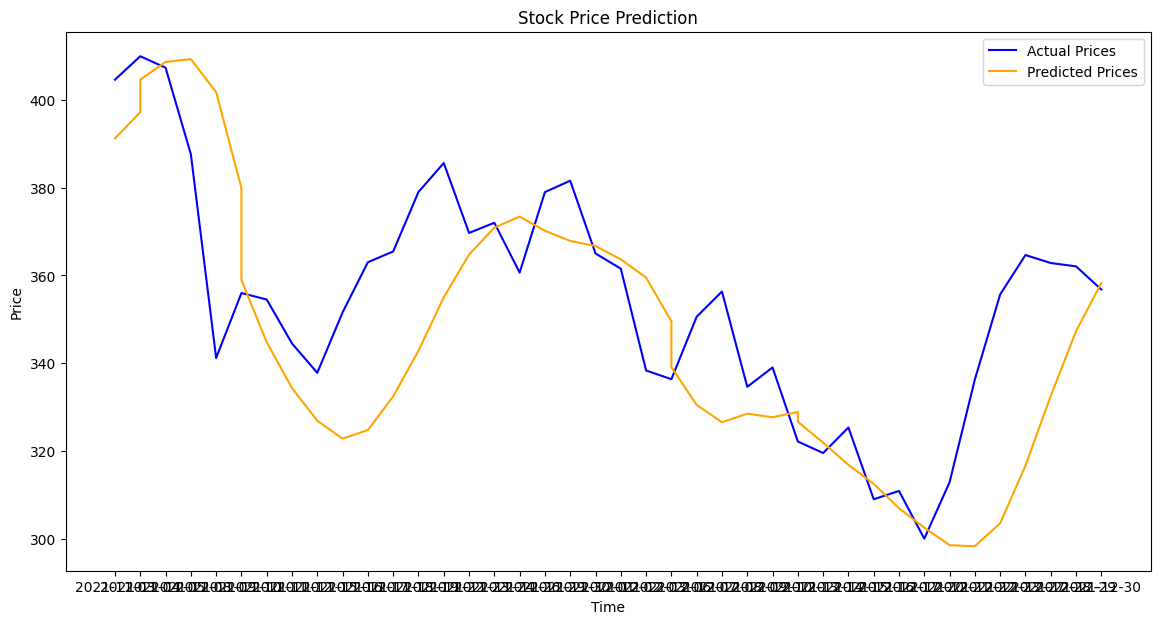

In [ ]:
# working on df
# I will write a fuction which will give two input parameters for training data
# n is the window size

#constants
window_size= 10
BATCH_SIZE = 32
EPOCHS = 50
LEARNING_RATE = 0.001



def rolling_window(data, n):
    X = []
    Y = []
    size = len(data)
    if size < n:
        return np.array([]), np.array([])  # Return empty arrays if data is too small
    for i in range(size - n):
        X.append(data['Close Normalized'].iloc[i:i+n])
        Y.append(data['Close Normalized'].iloc[i+n])
    return np.array(X), np.array(Y)

# Generate training and testing datasets
data_X_train, data_Y_train = rolling_window(training_df, window_size)
data_X_test, data_Y_test = rolling_window(testing_df, window_size)

data_X_train = data_X_train.reshape(data_X_train.shape[0], data_X_train.shape[1], 1)
data_X_test = data_X_test.reshape(data_X_test.shape[0], data_X_test.shape[1], 1)


model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='mse')


history = model.fit(data_X_train, data_Y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,validation_data=(data_X_test, data_Y_test))


loss = model.evaluate(data_X_test, data_Y_test)
print(f"Test Loss: {loss}")


y_pred_LSTM = model.predict(data_X_test)
y_pred_actual_LSTM = scaler.inverse_transform(y_pred_LSTM)
y_test_actual = scaler.inverse_transform(data_Y_test.reshape(-1, 1))

plt.figure(figsize=(14, 7))
plt.plot(testing_df.index[window_size:], y_test_actual, label='Actual Prices', color='blue')
plt.plot(testing_df.index[window_size:], y_pred_actual_LSTM, label='Predicted Prices', color='orange')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


# **Modified Model**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.4210 - val_loss: 3.3130
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3982 - val_loss: 3.4778
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3882 - val_loss: 3.6240
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.3359 - val_loss: 3.7661
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3133 - val_loss: 3.9113
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3097 - val_loss: 4.0555
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2772 - val_loss: 4.2056
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2716 - val_loss: 4.3602
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2486 - val_loss: 4.4931
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2493 - val_loss: 4.6253
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2349 - val_loss: 4.7506
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Mean Squared Error: 9514.929624134807
M

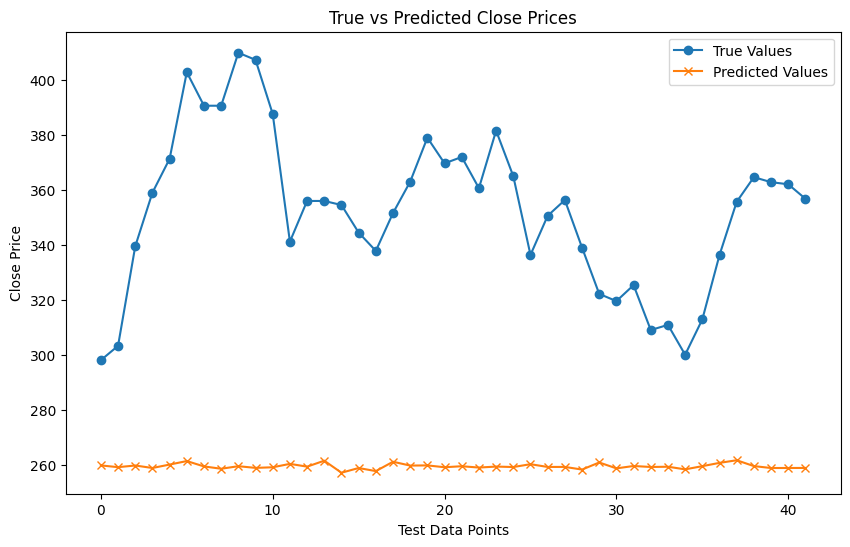

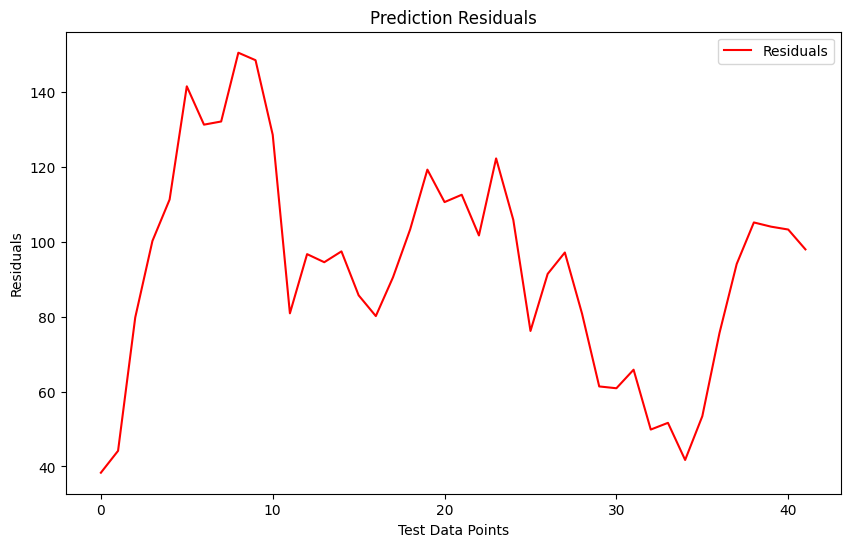

In [ ]:
import pandas as pd
from textblob import TextBlob
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

df = pd.read_csv('/content/tesla_stock_and_news.csv')
df.index = pd.to_datetime(df['Date'])
df.drop(columns=['Date'], inplace=True)

def sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity


df['Sentiment_polarity'] = df['Headline'].apply(sentiment)
df['Sentiment_subjectivity'] = df['Headline'].apply(subjectivity)

df['Difference'] = df['Close'] - df['Open']
df.drop(columns=['Headline'], inplace=True)

df = df[df['Sentiment_polarity'] != 0]


X = df[['Difference', 'Sentiment_polarity', 'Sentiment_subjectivity']].values
y = df['Close'].values

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)


X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


LEARNING_RATE = 0.001
model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='mse')

# preventing overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)


y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)


mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


plt.figure(figsize=(10, 6))
plt.plot(y_true, label='True Values', marker='o')
plt.plot(y_pred, label='Predicted Values', marker='x')
plt.title('True vs Predicted Close Prices')
plt.xlabel('Test Data Points')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Plotting residual values
residuals = y_true - y_pred
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='red')
plt.title('Prediction Residuals')
plt.xlabel('Test Data Points')
plt.ylabel('Residuals')
plt.legend()
plt.show()


Bidirectional LSTM Implementation while splitting in multiple folds.

Fold 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - loss: 1.4917 - val_loss: 2.0037
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.3903 - val_loss: 1.9844
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.2831 - val_loss: 1.9639
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.2883 - val_loss: 1.9423
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.2404 - val_loss: 1.9175
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.2534 - val_loss: 1.8909
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.2738 - val_loss: 1.8624
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.2023 - val_loss: 1.8326
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.1951 - val_loss: 1.8009
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.1186 - val_loss: 1.7669
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.0277 - val_loss: 1.7300
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.0240 - val_loss: 1.6893
Epo

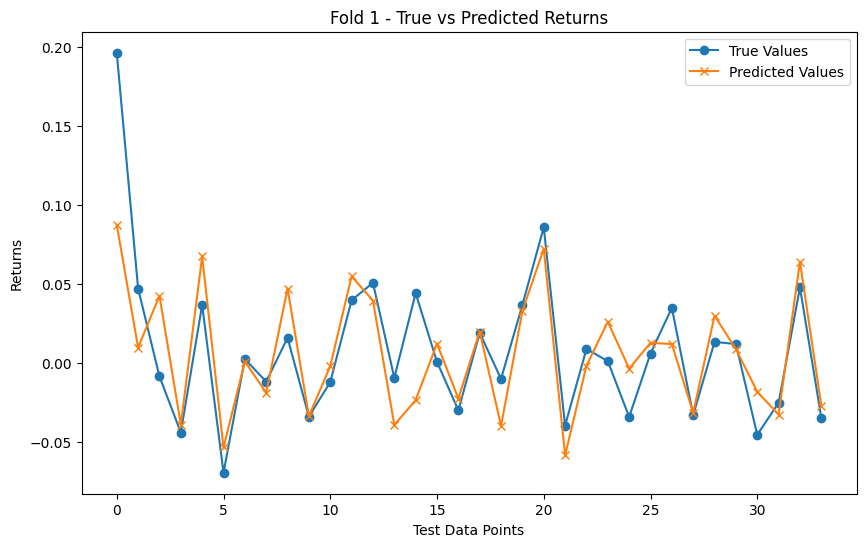

Fold 2
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 300ms/step - loss: 1.6492 - val_loss: 0.4140
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.5317 - val_loss: 0.4040
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.4659 - val_loss: 0.3924
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.6415 - val_loss: 0.3792
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.7226 - val_loss: 0.3646
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.4699 - val_loss: 0.3490
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.3051 - val_loss: 0.3330
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.1464 - val_loss: 0.3164
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.3944 - val_loss: 0.2993
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.0330 - val_loss: 0.2830
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.1473 - val_loss: 0.2688
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.0772 - val_loss: 0.2598
Epoch 13/50

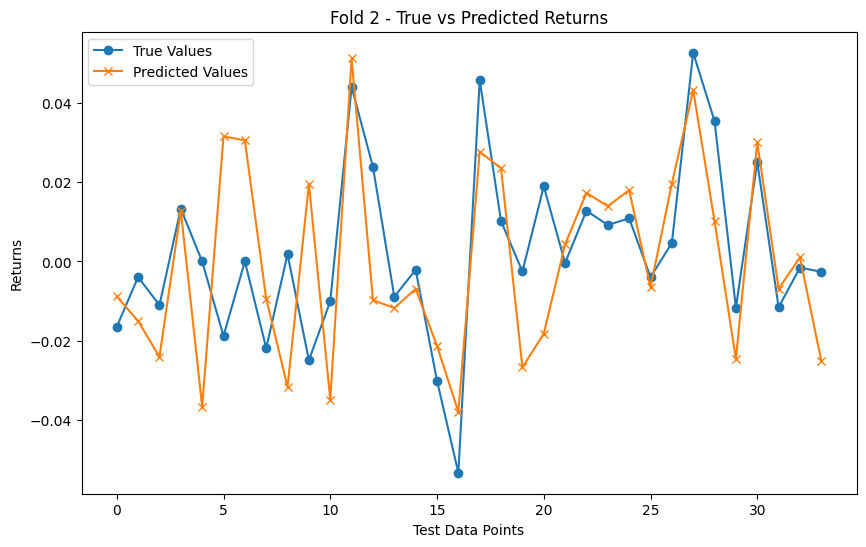

Fold 3
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - loss: 1.2011 - val_loss: 0.3628
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2878 - val_loss: 0.3488
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0721 - val_loss: 0.3324
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0031 - val_loss: 0.3124
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0578 - val_loss: 0.2883
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1851 - val_loss: 0.2607
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8895 - val_loss: 0.2308
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0683 - val_loss: 0.2000
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7737 - val_loss: 0.1702
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6134 - val_loss: 0.1419
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.5222 - val_loss: 0.1192
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5430 - val_loss: 0.1112
Epoch 13/50

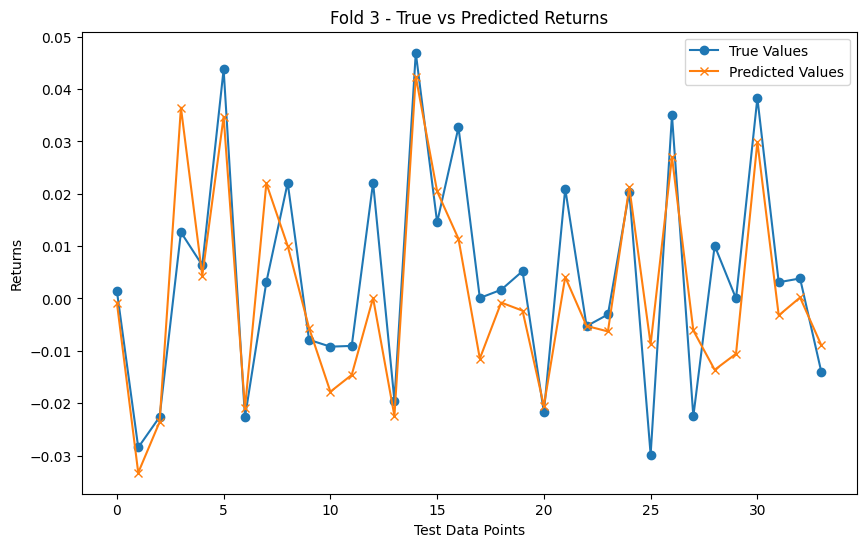

Fold 4
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 224ms/step - loss: 1.0774 - val_loss: 0.3686
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8843 - val_loss: 0.3439
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.9692 - val_loss: 0.3119
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.9591 - val_loss: 0.2750
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.7113 - val_loss: 0.2350
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6475 - val_loss: 0.1932
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.7879 - val_loss: 0.1561
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.4157 - val_loss: 0.1369
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.5266 - val_loss: 0.1409
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3886 - val_loss: 0.1703
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4548 - val_loss: 0.1957
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4672 - val_loss: 0.1888
Epoch 13/50

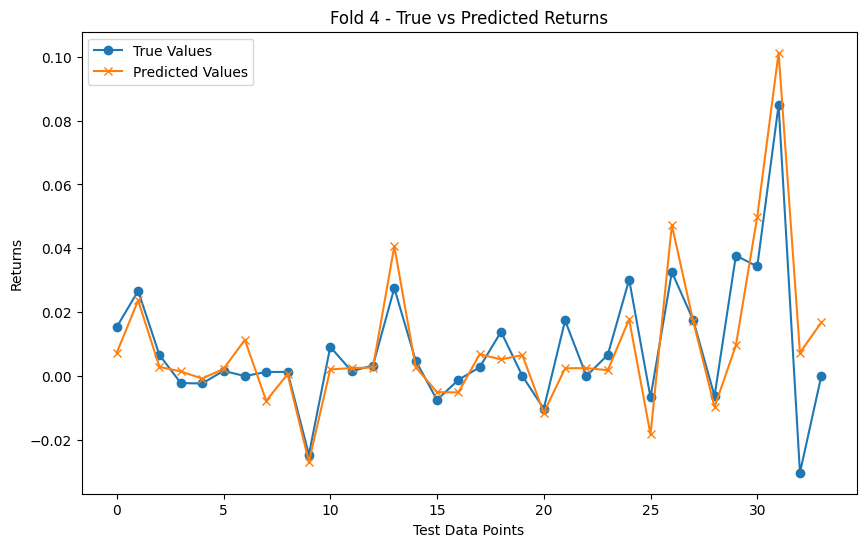

Fold 5
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - loss: 0.7851 - val_loss: 1.1645
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.9419 - val_loss: 1.0160
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7369 - val_loss: 0.8394
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7321 - val_loss: 0.6571
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5744 - val_loss: 0.4942
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7363 - val_loss: 0.4102
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5132 - val_loss: 0.4449
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3923 - val_loss: 0.5522
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3921 - val_loss: 0.6655
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3189 - val_loss: 0.6792
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3299 - val_loss: 0.6426
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3067 - val_loss: 0.6207
Epoch 13/50

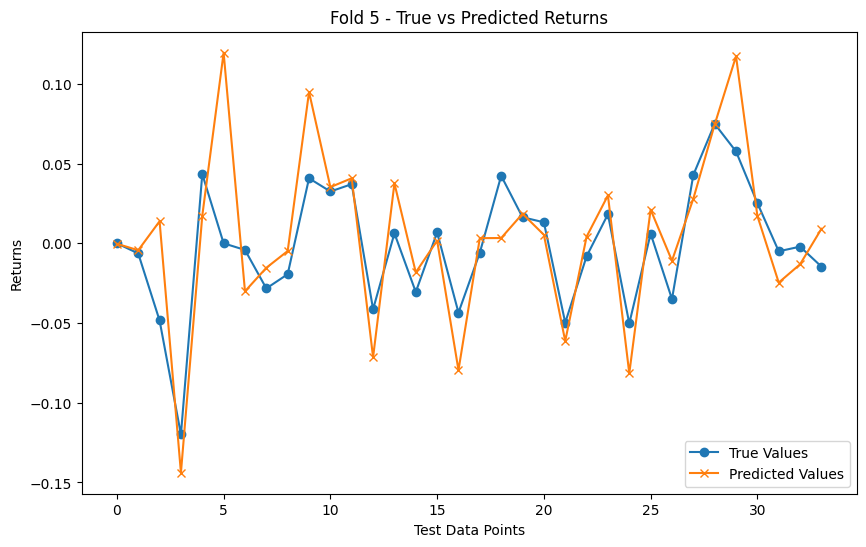

In [ ]:
import pandas as pd
from textblob import TextBlob
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


df = pd.read_csv('/content/tesla_stock_and_news.csv')
df.index = pd.to_datetime(df['Date'])
df.drop(columns=['Date'], inplace=True)
df['Difference'] = df['Close'] - df['Open']
def sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity


df['Sentiment_polarity'] = df['Headline'].apply(sentiment)
df['Sentiment_subjectivity'] = df['Headline'].apply(subjectivity)
df['Return'] = df['Close'].pct_change().fillna(0)
df.drop(columns=['Headline'], inplace=True)


df = df[df['Sentiment_polarity'] != 0]


X = df[['Difference', 'Sentiment_polarity', 'Sentiment_subjectivity']].values
y = df['Return'].values


scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

tscv = TimeSeriesSplit(n_splits=5)
fold = 1
for train_idx, test_idx in tscv.split(X_scaled):
    print(f"Fold {fold}")
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_scaled[train_idx], y_scaled[test_idx]

    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


    model = Sequential([
        Bidirectional(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
        Dropout(0.3),
        LSTM(64, return_sequences=False),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mse')


    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=1
    )


    y_pred_scaled = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)


    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"Fold {fold} - MSE: {mse}, MAE: {mae}")


    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label='True Values', marker='o')
    plt.plot(y_pred, label='Predicted Values', marker='x')
    plt.title(f'Fold {fold} - True vs Predicted Returns')
    plt.xlabel('Test Data Points')
    plt.ylabel('Returns')
    plt.legend()
    plt.show()

    fold += 1
